Source of Data: <br>
https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets <br>
https://www.muratkoklu.com/datasets/

Citation Request :
KOKLU, M., KURSUN, R., TASPINAR, Y. S., and CINAR, I. (2021). Classification of Date Fruits into Genetic Varieties Using Image Analysis. Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293, DOI:10.1155/2021/4793293
https://www.hindawi.com/journals/mpe/2021/4793293/

Abstract: A great number of fruits are grown around the world, each of which has various types. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. The external appearance of the fruits is a major determinant of the fruit type. Determining the variety of fruits by looking at their external appearance may necessitate expertise, which is time-consuming and requires great effort. The aim of this study is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using three different machine learning methods. In accordance with this purpose, 898 images of seven different date fruit types were obtained via the computer vision system (CVS). Through image processing techniques, a total of 34 features, including morphological features, shape, and color, were extracted from these images. First, models were developed by using the logistic regression (LR) and artificial neural network (ANN) methods, which are among the machine learning methods. Performance results achieved with these methods are 91.0% and 92.2%, respectively. Then, with the stacking model created by combining these models, the performance result was increased to 92.8%. It has been concluded that machine learning methods can be applied successfully for the classification of date fruit types.

# Introduction

In this project, we'll try to come up with a model that can classify the different varieties of date fruits: Safavi, Dokol, Rotana, Deglet, Sogay, Iraqi, and Berhi.  The dataset which we'll be using gives a wide range of features, and we'll be experimenting with different models and seeing what works best.

In [1]:
#Rough Plan:
#First step: imports
#Second step load data
#Third step: data analysis and feature selection
#Fourth step: preprocessing and model building
#Fifth step: Evaluation

##  Importing The Necessary Libraries

In [2]:
#data manipulation and analysis
import numpy as np
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#feature selection
from sklearn.feature_selection import f_classif

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier

#evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## Loading the Data

In [3]:
df= pd.read_excel("Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

## Exploring the Data!

In [4]:
#Getting a first look of the data and all its features
df.sample(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
161,226586,1773.1750,662.9202,436.9543,0.7520,537.1204,0.9919,228431,0.8083,1.5171,...,2.4317,3.4604,2.5807,-16837611520,-14030576640,-17969643520,43.4915,40.4844,45.2207,DEGLET
111,246558,1865.2419,664.2224,475.3474,0.6985,560.2922,0.9865,249939,0.7367,1.3973,...,2.5611,1.7660,1.9373,-49681387520,-45122826240,-40668385280,68.2776,65.5212,62.9048,DEGLET
520,379703,2327.3159,808.6260,603.5130,0.6656,695.3077,0.9815,386849,0.7885,1.3399,...,3.4431,3.6240,3.1232,-67456614400,-60271841280,-51568693248,65.5561,62.4925,57.4187,ROTANA
13,340451,2098.1631,724.4111,600.3284,0.5597,658.3887,0.9971,341437,0.7813,1.2067,...,2.4762,2.7434,4.2934,-40366313472,-34643922944,-24675141632,53.6975,50.2603,41.2631,BERHI
39,402279,2295.8630,798.9365,643.2753,0.5931,715.6797,0.9936,404887,0.7867,1.2420,...,5.5889,12.5304,9.9496,-30746945536,-32178810880,-35126345728,43.7705,45.6162,46.3010,BERHI


In [5]:
#There is no missing data
#All the features are numerical, except for the target variable(the class of the date fruit).
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [6]:
#Descriptive Statistics!  
#I wasn't able to glean much but one noticable fact is that the scale of the numbers vary widely. 
#Therefore the data will have to be standardized if we are using logistic regression or other models that are affected by this.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJOR_AXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINOR_AXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECT_RATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


In [7]:
#Number of data points per class of date fruit
df.value_counts("Class")

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
dtype: int64

<AxesSubplot:>

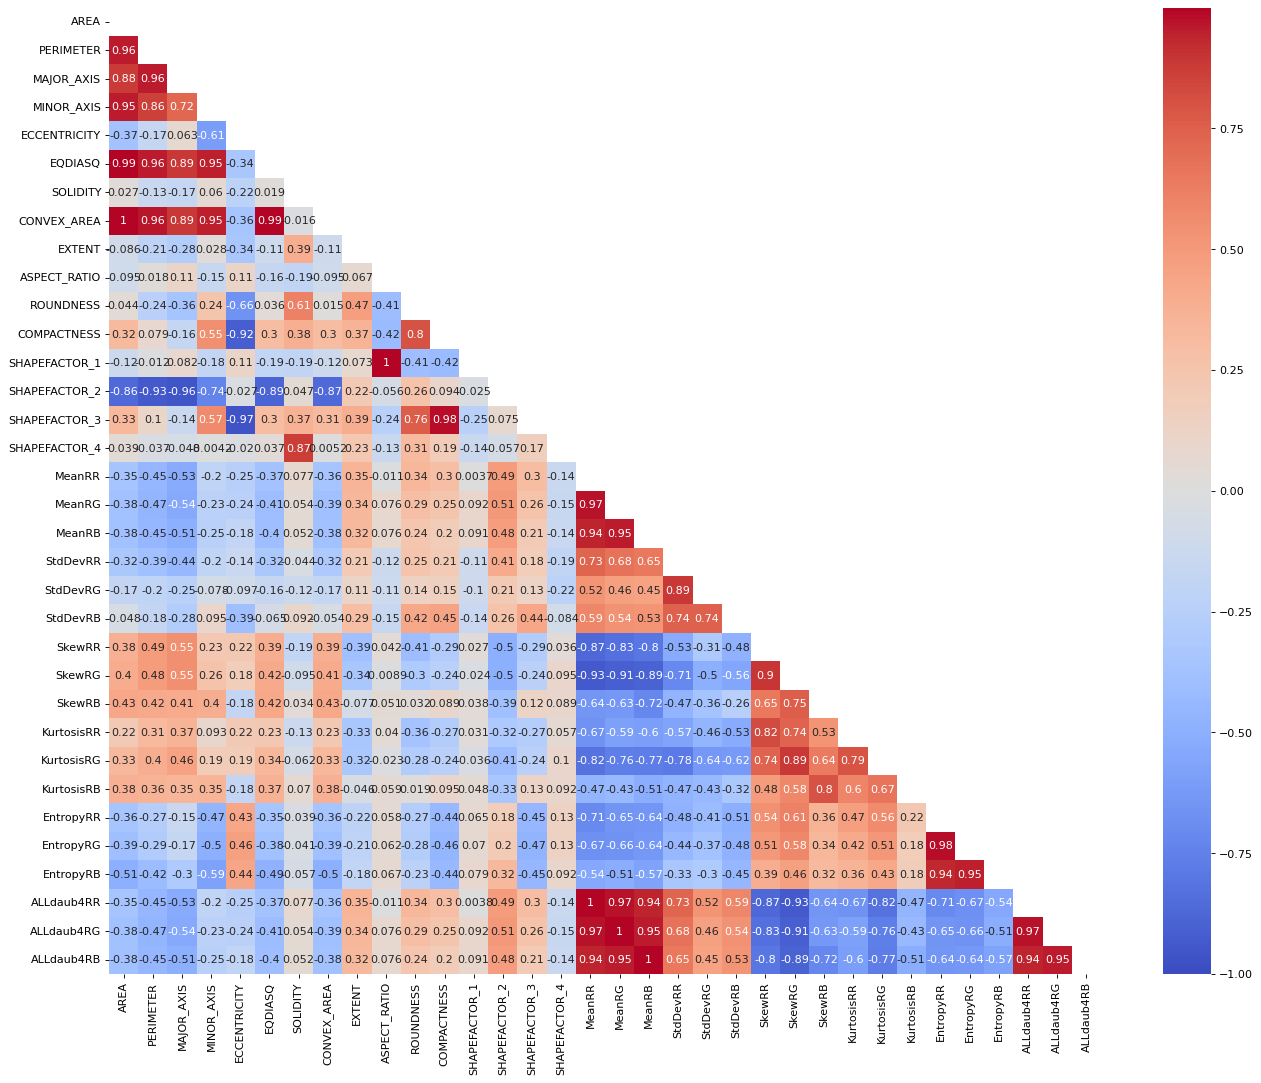

In [8]:
#Creating a heatmap to see which features correlate with each other!

#This is to resize the matplotlib figure to be bigger, since it's default is way too small.
figure = plt.gcf()  #get current figure
figure.set_size_inches(20,16)
figure.set_dpi(80)

#This is to get rid of that upper right triangle in the heatmap, since it's just duplicate/unecessary information.
mask = np.zeros_like(df.corr(), dtype= bool)
mask[np.triu_indices_from(mask)] = True  #I can't believe NumPy has a function for removing the upper right triangle lol.


#Annot = True adds the Pearson value, vmin = -1 sets the minimum color scale to be at -1,
# cmap sets it to a very divergent color scheme so I can actually tell the difference.
sns.heatmap(df.corr(), annot = True, vmin = -1, cmap = 'coolwarm', mask = mask)

## Removing Outliers


In [9]:
#I will now investigate outliers and irregularities in the data.  I will define it as 3 standard deviations from the mean.
def printNumOutliers(df):
    '''Takes in the DateFruit Dataframe, and prints the number of outliers for each variable.
        An outlier is considered to be a data point that is more than 3 standard deviations from the mean.
        Each independent variable is separated by class of date fruit, and the outliers are found from there.
    '''
    mean_df = df.groupby("Class").mean()  #tables to quickly access mean and std from.
    std_df = df.groupby("Class").std()

    for col in df.columns[:-1]:    #Finds the outliers for each column
        totalOutliers = 0
        for date_fruit in df.Class.unique():   #separates the column by class of date fruit.

            #finds mean and standard deviation
            mean = mean_df.loc[date_fruit,col]
            std = std_df.loc[date_fruit,col]

            #gets the number of outliers
            upper = df[df["Class"] == date_fruit].loc[:,col] > mean + 3*std
            lower = df[df["Class"] == date_fruit].loc[:,col] < mean - 3*std
            totalOutliers += upper.sum() + lower.sum()
        print(f'{col}:  {totalOutliers}')

def getOutliers(df):
    ''' Same as the function above(printNumOutliers), but gives the indices of such outliers.
    Works essentially the same way as the function above'''
    mean_df = df.groupby("Class").mean()
    std_df = df.groupby("Class").std()
    outliers = []
    for col in df.columns[:-1]:
        for date_fruit in df.Class.unique():
            mean = mean_df.loc[date_fruit,col]
            std = std_df.loc[date_fruit,col]
            upper = df[df["Class"] == date_fruit].loc[:,col] > mean + 3*std
            lower = df[df["Class"] == date_fruit].loc[:,col] < mean - 3*std
            outliers += upper[upper].index.tolist() + lower[lower].index.tolist()
    return [*set(outliers)]
printNumOutliers(df)

AREA:  2
PERIMETER:  4
MAJOR_AXIS:  1
MINOR_AXIS:  4
ECCENTRICITY:  10
EQDIASQ:  4
SOLIDITY:  17
CONVEX_AREA:  2
EXTENT:  4
ASPECT_RATIO:  2
ROUNDNESS:  9
COMPACTNESS:  3
SHAPEFACTOR_1:  8
SHAPEFACTOR_2:  11
SHAPEFACTOR_3:  4
SHAPEFACTOR_4:  17
MeanRR:  3
MeanRG:  1
MeanRB:  3
StdDevRR:  3
StdDevRG:  1
StdDevRB:  5
SkewRR:  3
SkewRG:  4
SkewRB:  4
KurtosisRR:  10
KurtosisRG:  10
KurtosisRB:  7
EntropyRR:  6
EntropyRG:  6
EntropyRB:  6
ALLdaub4RR:  3
ALLdaub4RG:  1
ALLdaub4RB:  3


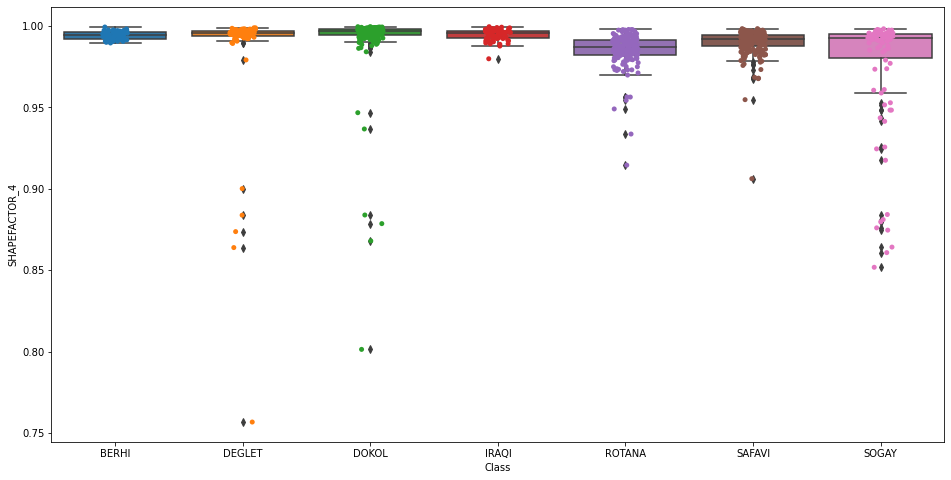

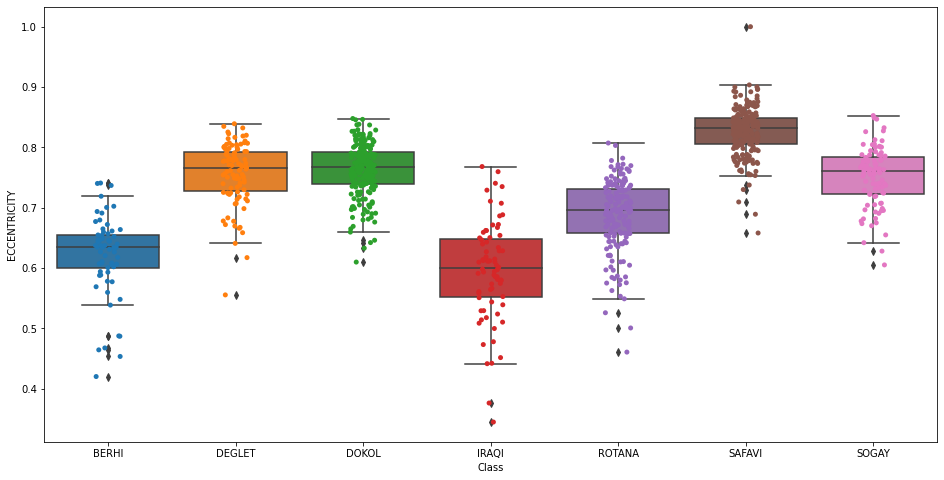

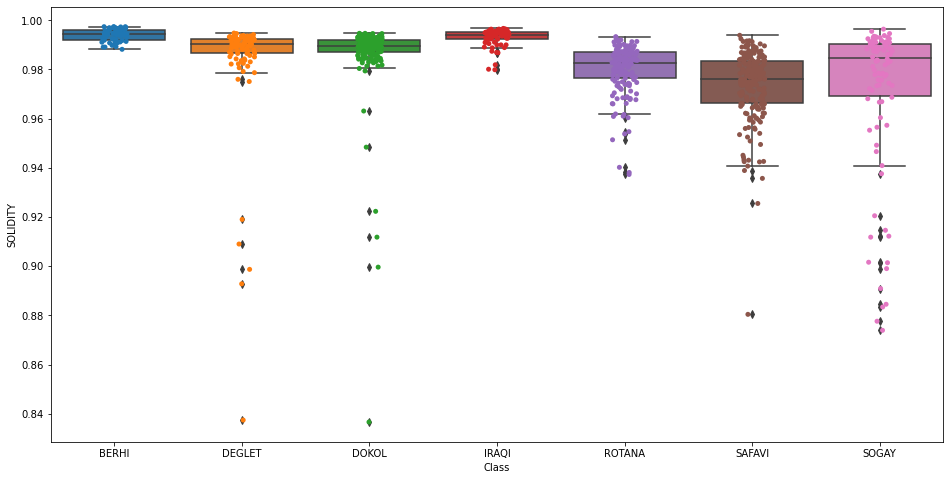

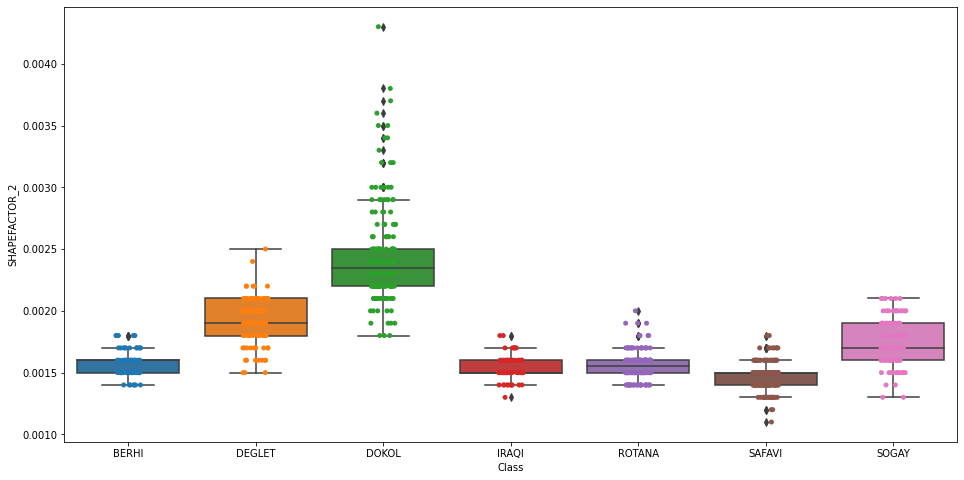

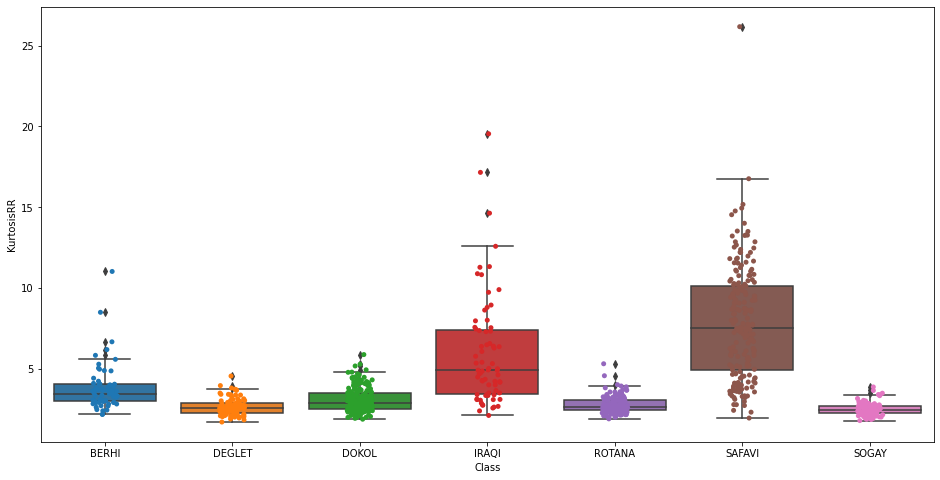

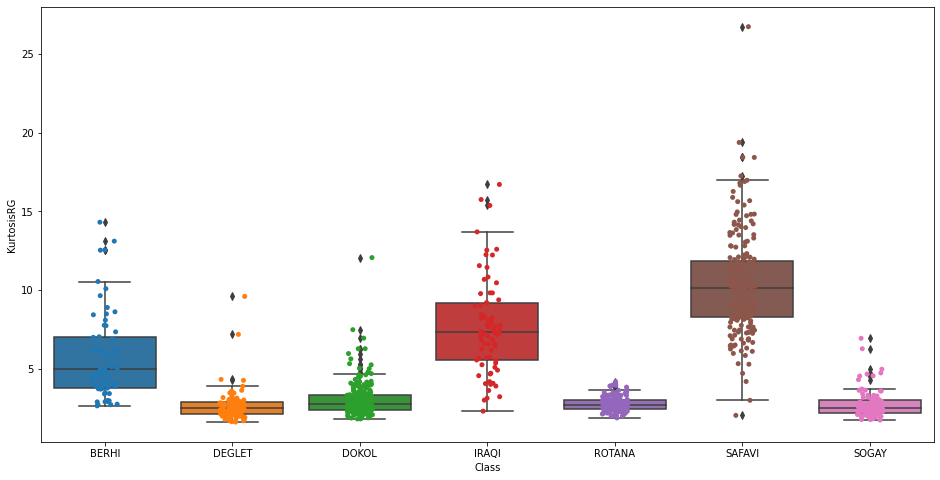

In [10]:
#Visualizations to see outliers for variables with more than 10 outliers.
columns = ["SHAPEFACTOR_4", "ECCENTRICITY", "SOLIDITY", "SHAPEFACTOR_2","KurtosisRR" ,"KurtosisRG"]
for i,column in enumerate(columns):
    plt.figure(figsize = (16,8))
    sns.stripplot(x = df["Class"], y = df[column])
    sns.boxplot(x = "Class", y = column, data = df)
    plt.show()

In [11]:
#Removing outliers
df = df[df["SHAPEFACTOR_2"] < .0040]
df = df[df["KurtosisRG"] < 20]
df = df[df["SOLIDITY"] > .86]


## Feature Selection

I will use two different methods for determining the importance/significance of each feature:  ANOVA and RandomForest.  I will test which method works better for this dataset, or even if the average of the two works better.


In [12]:
#separates the dataset from the target variable
features = df.drop("Class", axis = 1)
target = df["Class"]


<AxesSubplot:>

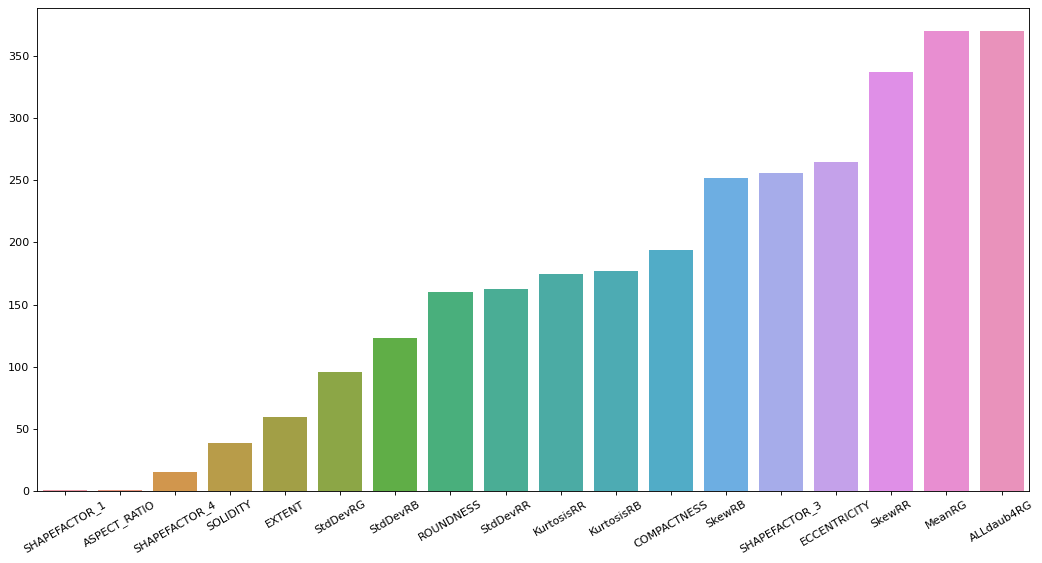

In [13]:
#Using ANOVA-F to quantify the usefullness of each feature.
fstat = f_classif(features,target)  #generate a numpy array with the f-values 
importanceANOVA = pd.Series(fstat[0], index = features.columns).sort_values()   #convert this into a sorted Series of it

#display the least important features in a bar chart
figure = plt.gcf()
ax = plt.gca()
figure.set_size_inches(16,8)
figure.set_dpi(80)
ax.tick_params(axis = 'x', labelrotation = 30)
sns.barplot(x = importanceANOVA.index[:18], y = importanceANOVA.values[:18])

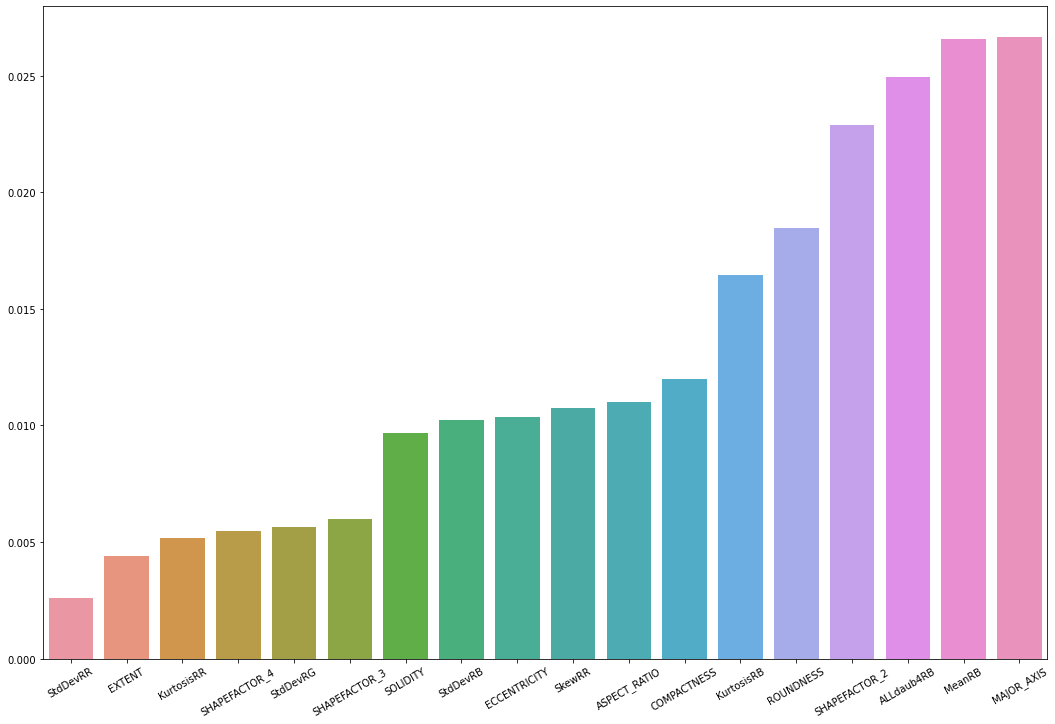

In [14]:
#Going to use Random Forest to determine the importance of the features
plt.figure(figsize=(18,12))
plt.gca().tick_params(axis = 'x', rotation = 30)
X_t, X_v, y_t, y_v = train_test_split(features, target, random_state = 0)

rfc = RandomForestClassifier(n_estimators=100,max_features='auto', max_depth=6, random_state = 0)
rfc.fit(X_t,y_t)
rfcpred = rfc.predict(X_v)
importanceRFC = pd.Series(rfc.feature_importances_,index=features.columns).sort_values()
sns.barplot(x = importanceRFC.index[:18], y = importanceRFC.values[:18])
plt.show()

In [15]:
#True if the feature is one of the top 18 features, False if not.
feature_importance = pd.concat([importanceANOVA.ge(importanceANOVA[18]), importanceRFC.ge(importanceRFC[18])], axis = 1)
feature_importance.columns = ["ANOVA","RFC"]
feature_importance["Score"] = np.sum(feature_importance, axis = 1)
feature_importance

,ANOVA,RFC,Score
SHAPEFACTOR_1,False,True,1
ASPECT_RATIO,False,False,0
SHAPEFACTOR_4,False,False,0
SOLIDITY,False,False,0
EXTENT,False,False,0
StdDevRG,False,False,0
StdDevRB,False,False,0
ROUNDNESS,False,False,0
StdDevRR,False,False,0
KurtosisRR,False,False,0


In [16]:
def selectFeatures(selection_type):
    selection_types = ["ANOVA", "RFC", "HYBRID"]
    if selection_type not in selection_types:
        raise ValueError("Invalid selection_type")
    
    if selection_type == "ANOVA":
        remove_cols = feature_importance.loc[feature_importance["ANOVA"] == False].index
        filtered_df = df.drop(remove_cols, axis = 1)
        print(remove_cols)
        return filtered_df

    if selection_type == "RFC":
        remove_cols = feature_importance.loc[feature_importance["RFC"] == False].index
        filtered_df = df.drop(remove_cols, axis = 1)
        print(remove_cols)
        return filtered_df

    if selection_type == "HYBRID":
        remove_cols = [col for col in df.columns[:-1] if feature_importance.loc[col,"Score"] ==0]
        filtered_df = df.drop(remove_cols, axis = 1)
        print(remove_cols) 
        return filtered_df

In [17]:
#After testing each of the methods, hybrid had the best results.  RFC only had a maximum accruacy of .91.
filtered_df = selectFeatures("HYBRID")

['ECCENTRICITY', 'SOLIDITY', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'KurtosisRR', 'KurtosisRB']


In [18]:
#printNumOutliers(filtered_df)
#filtered_df = filtered_df.drop(getOutliers(df))
#Never used because removing the outliers made the model worse.

In [19]:
ss = StandardScaler()
y = filtered_df.Class
test = ss.fit_transform(filtered_df.drop(["Class"], axis = 1))
X_t, X_v, y_t, y_v = train_test_split(test, y,random_state=0)


# Model Creation

### Random Forest Classifier, Logistic Regression, and Gradient Boosting Classifier:

In [20]:
def models(X_t, X_v, y_t, y_v):
    print("Random Forest Classifier")
    rfc = RandomForestClassifier(n_estimators= 100, max_features = 'auto', max_depth = 8, random_state=0, n_jobs = -1)
    rfc.fit(X_t,y_t)
    predictions= rfc.predict(X_v)
    print(classification_report(y_v, predictions))
    print(f'Accuracy : {(predictions == y_v).sum()/len(predictions)}')
    labels = ["BERHI","DEGLET","DOKOL","IRAQI","ROTANA","SAFAVI","SOGAY"]
    cm_df = pd.DataFrame(confusion_matrix(y_v,predictions), columns = labels, index = labels)  #making a dataframe for the confusion matrix to display it in a heatmap
    plt.figure(figsize= (10,5))
    sns.heatmap(data = cm_df, annot = True, cmap = 'viridis')
    plt.show()
    print("--------------------------------\n")

    print("Logistic Regression")
    lr = LogisticRegression(C = 1, multi_class = 'multinomial', n_jobs = -1, max_iter = 150)
    lr.fit(X_t, y_t)
    predictions = lr.predict(X_v)
    print(classification_report(y_v, predictions))
    print(f'Accuracy : {(predictions == y_v).sum()/len(predictions)}')
    cm_df = pd.DataFrame(confusion_matrix(y_v,predictions), columns = labels, index = labels)  #making a dataframe for the confusion matrix to display it in a heatmap
    plt.figure(figsize= (10,5))
    sns.heatmap(data = cm_df, annot = True, cmap = 'viridis')
    plt.show()
    print("--------------------------------\n")

    print("Gradient Boosting Classifier")
    gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1)
    gbc.fit(X_t, y_t)
    predictions = gbc.predict(X_v)
    print(classification_report(y_v, predictions))
    print(f'Accuracy : {(predictions == y_v).sum()/len(predictions)}')
    cm_df = pd.DataFrame(confusion_matrix(y_v,predictions), columns = labels, index = labels)  #making a dataframe for the confusion matrix to display it in a heatmap
    plt.figure(figsize= (10,5))
    sns.heatmap(data = cm_df, annot = True, cmap = 'viridis')
    plt.show()

Random Forest Classifier
              precision    recall  f1-score   support

       BERHI       0.82      0.78      0.80        18
      DEGLET       0.68      0.88      0.77        17
       DOKOL       1.00      0.96      0.98        57
       IRAQI       0.84      0.80      0.82        20
      ROTANA       0.92      0.95      0.93        37
      SAFAVI       0.98      1.00      0.99        48
       SOGAY       0.88      0.78      0.82        27

    accuracy                           0.91       224
   macro avg       0.87      0.88      0.87       224
weighted avg       0.92      0.91      0.91       224

Accuracy : 0.9107142857142857


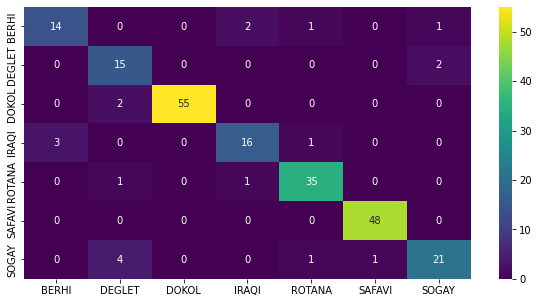

--------------------------------

Logistic Regression
              precision    recall  f1-score   support

       BERHI       0.82      0.78      0.80        18
      DEGLET       0.74      0.82      0.78        17
       DOKOL       1.00      0.98      0.99        57
       IRAQI       0.89      0.80      0.84        20
      ROTANA       0.92      0.97      0.95        37
      SAFAVI       0.96      0.98      0.97        48
       SOGAY       0.85      0.81      0.83        27

    accuracy                           0.92       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.92      0.92      0.91       224

Accuracy : 0.9151785714285714


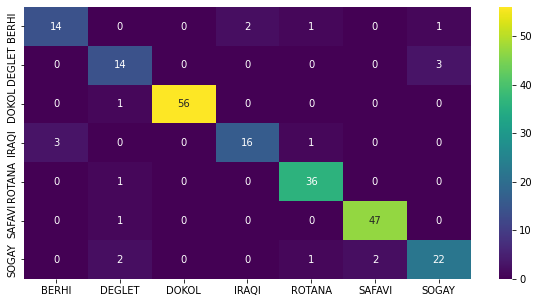

--------------------------------

Gradient Boosting Classifier
              precision    recall  f1-score   support

       BERHI       0.64      0.39      0.48        18
      DEGLET       0.55      0.65      0.59        17
       DOKOL       0.98      0.96      0.97        57
       IRAQI       0.62      0.80      0.70        20
      ROTANA       0.92      0.95      0.93        37
      SAFAVI       1.00      0.98      0.99        48
       SOGAY       0.73      0.70      0.72        27

    accuracy                           0.85       224
   macro avg       0.78      0.78      0.77       224
weighted avg       0.85      0.85      0.85       224

Accuracy : 0.8482142857142857


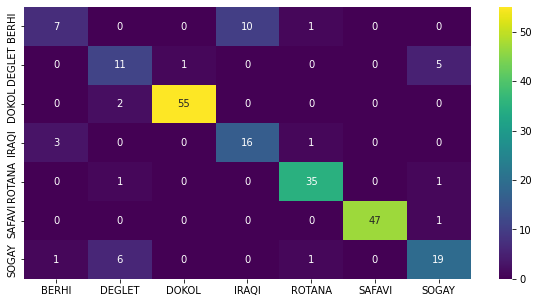

In [21]:
models(X_t,X_v,y_t,y_v)

Conclusion:  Of the models used, logistic regression performed the best at an accuracy of 91.5%
